In [93]:
import pandas as pd
import seaborn as sns
train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')

In [55]:
import numpy as np
quantile_25=np.quantile(train['fixed acidity'], 0.25)
quantile_75=np.quantile(train['fixed acidity'], 0.75)
IQR=quantile_75-quantile_25
minimum=quantile_25-1.5*IQR
maximun=quantile_75+1.5*IQR
train=train[(minimum<=train['fixed acidity'])&(train['fixed acidity']<=maximun)]

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train[['fixed acidity']])
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])
test['Scaled fixed acidity'] = scaler.transform(test[['fixed acidity']])

In [95]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoder.fit(train[['type']])
onehot = encoder.transform(train[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
train = pd.concat([train,onehot], axis = 1).drop(columns = ['type'])

onehot = encoder.transform(test[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
test = pd.concat([test, onehot], axis = 1)
test = test.drop(columns = ['type'])

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  Scaled fixed acidity  5497 non-null   float64
 14  0                     5497 non-null   float64
 15  1                    

In [75]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier()

In [76]:
X=train.drop(['quality'], axis=1)
y=train['quality']

In [77]:
random_forest.fit(X,y)

RandomForestClassifier()

In [79]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5, shuffle=True, random_state=0)

In [80]:
for train_idx, valid_idx in kf.split(train):
    train_data=train.iloc[train_idx]
    valid_data=train.iloc[valid_idx]

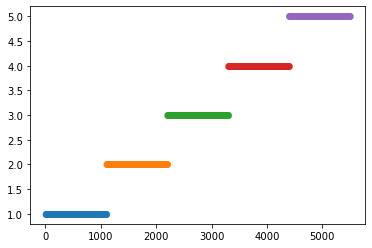

In [85]:
import matplotlib.pyplot as plt


kf = KFold(n_splits = 5, shuffle = False)
train_idx_store = []
valid_idx_store = []

i = 1
for train_idx, valid_idx in kf.split(train):
    plt.scatter(valid_idx, [i for x in range(len(valid_idx))], alpha = 0.1)
    i += 1
plt.show()

In [96]:
X = train.drop(columns = ['index','quality'])
y = train['quality']
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)
model = RandomForestClassifier(random_state = 0)
valid_scores = []
test_predictions = []

In [97]:
from sklearn.metrics import accuracy_score
for train_idx, valid_idx in kf.split(X,y):
    X_tr = X.iloc[train_idx]
    y_tr = y.iloc[train_idx]
    X_val = X.iloc[valid_idx]
    y_val = y.iloc[valid_idx]
    model.fit(X_tr, y_tr)
    valid_prediction = model.predict(X_val)
    score = accuracy_score(y_val, valid_prediction)
    valid_scores.append(score)
    print(score)
    print('평균 점수 : ', np.mean(valid_scores))

0.69
평균 점수 :  0.69
0.6663636363636364
평균 점수 :  0.6781818181818182
0.6569608735213831
평균 점수 :  0.6711081699616731
0.6760691537761602
평균 점수 :  0.6723484159152949
0.6715195632393085
평균 점수 :  0.6721826453800976


In [98]:
for train_idx, valid_idx in kf.split(X,y):
    X_tr = X.iloc[train_idx]
    y_tr = y.iloc[train_idx]
    X_val = X.iloc[valid_idx]
    y_val = y.iloc[valid_idx]
    model.fit(X_tr, y_tr)
    test_prediction = model.predict(test.drop(columns = ['index']))
    test_predictions.append(test_prediction)

In [99]:
test_predictions = pd.DataFrame(test_predictions)
test_predictions

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,5,6,6,5,6,6,6,6,6,7,...,6,6,6,5,7,6,6,5,6,6
1,5,6,6,5,6,6,6,6,6,7,...,6,6,6,6,7,6,6,5,6,6
2,6,6,6,5,6,6,6,6,6,7,...,6,6,6,6,7,5,6,5,6,6
3,5,6,6,6,6,6,5,6,6,6,...,6,6,6,6,7,6,6,5,6,6
4,5,6,6,5,7,6,5,6,6,7,...,6,6,6,6,6,6,5,5,6,7


In [100]:
test_prediction = test_predictions.mode()
test_prediction = test_predictions.values[0]
test_prediction

array([5, 6, 6, 5, 6, 6, 6, 6, 6, 7, 6, 5, 7, 6, 5, 5, 6, 7, 5, 6, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5,
       6, 6, 5, 6, 4, 6, 5, 5, 6, 4, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 7, 5,
       7, 6, 6, 5, 5, 6, 6, 7, 7, 5, 6, 5, 6, 7, 5, 5, 6, 6, 6, 7, 5, 5,
       6, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 7, 6, 7, 6, 5, 8, 6, 5,
       6, 5, 6, 5, 6, 5, 5, 6, 6, 7, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6,
       6, 5, 6, 6, 6, 6, 7, 7, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 7, 6, 6, 6, 5, 6, 6, 7, 6, 6,
       6, 6, 7, 6, 5, 6, 6, 6, 5, 6, 7, 7, 6, 6, 6, 7, 7, 6, 7, 5, 5, 7,
       5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 7, 5, 6, 6, 6, 6, 5, 7, 7,
       6, 6, 6, 6, 5, 5, 5, 6, 5, 7, 8, 6, 5, 7, 6,

In [101]:
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission['quality'] = test_prediction
sample_submission.to_csv('./submission_KFOLD.csv', index=False)